In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [3]:
toyota = pd.read_csv('ToyotaCorolla - MLR.csv')
toyota

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# 1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [4]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
toyota.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


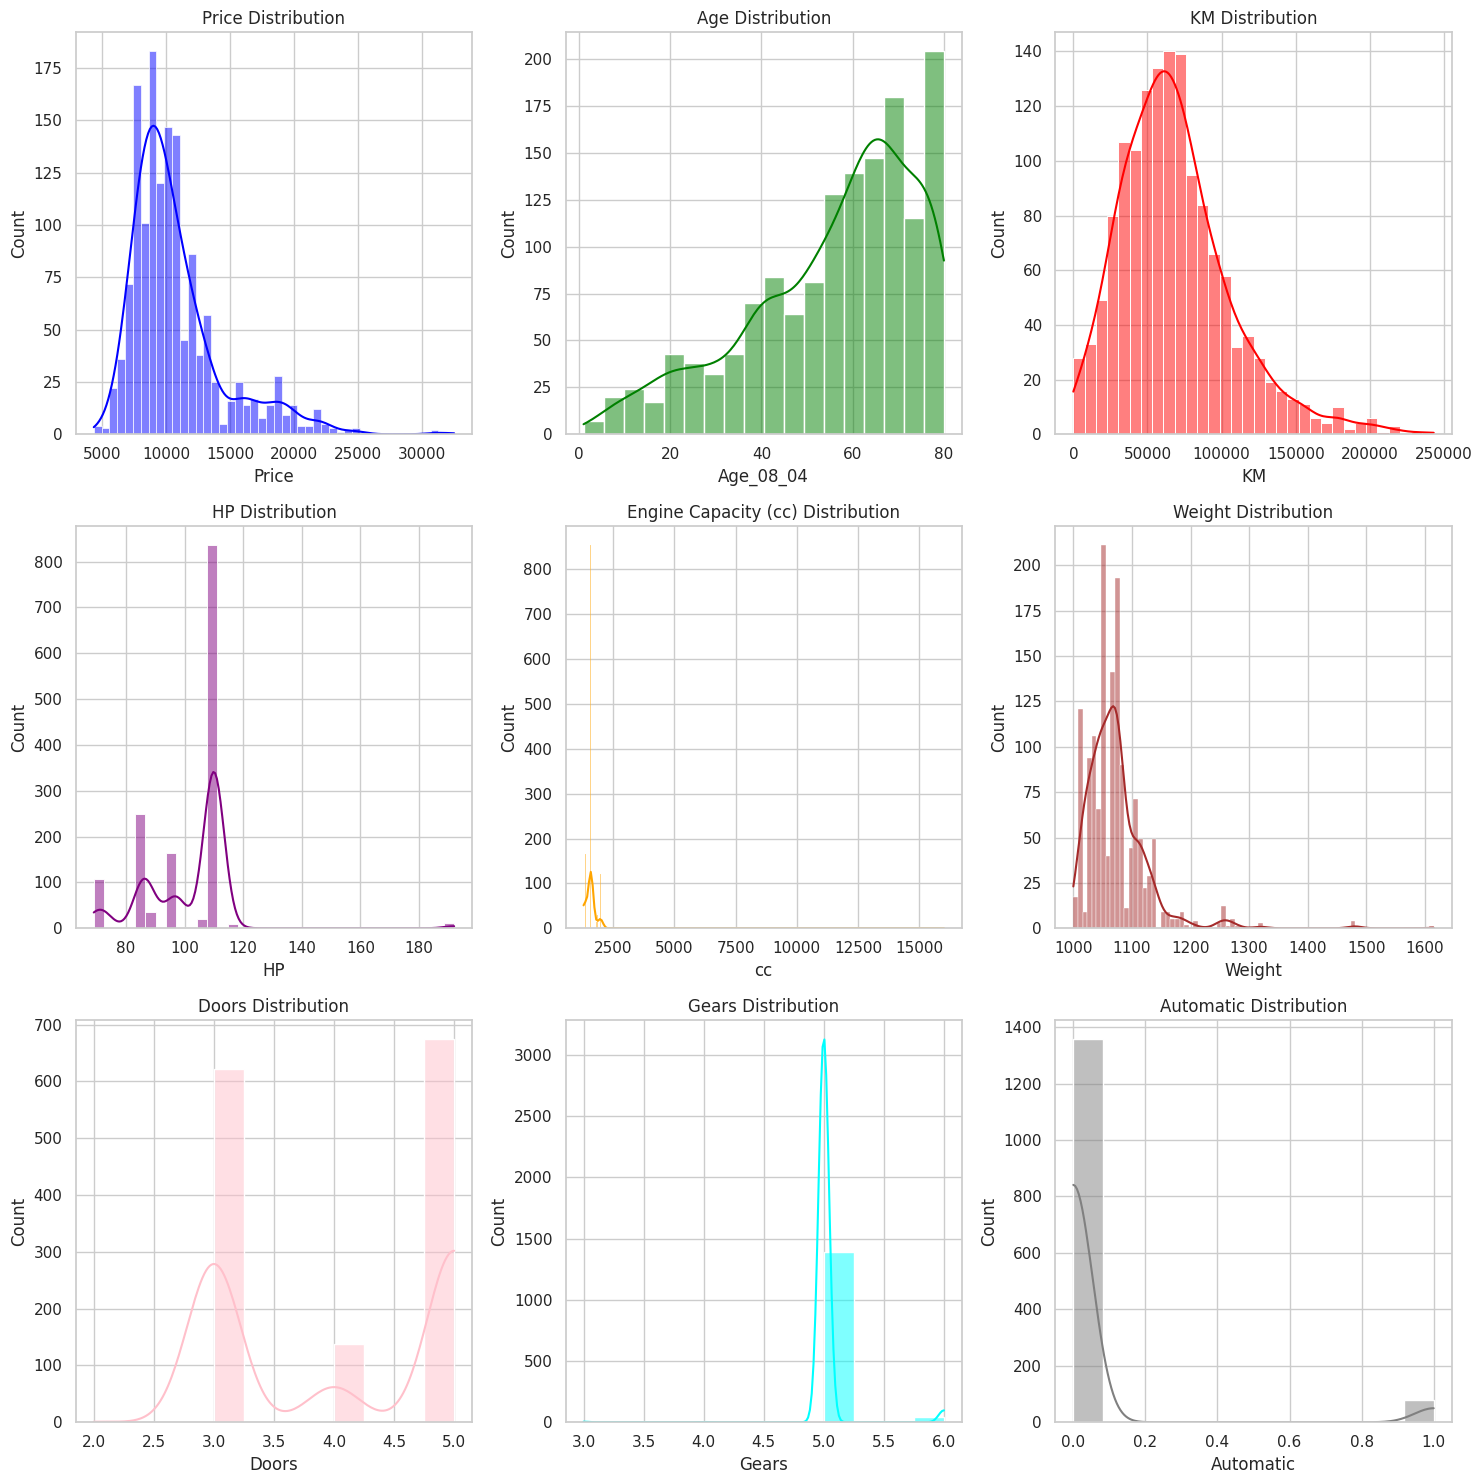

In [6]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
# Price Distribution
sns.histplot(toyota['Price'], kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Price Distribution')
# Age_08_04 Distribution
sns.histplot(toyota['Age_08_04'], kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Age Distribution')
# KM Distribution
sns.histplot(toyota['KM'], kde=True, ax=axs[0, 2], color='red')
axs[0, 2].set_title('KM Distribution')
# HP Distribution
sns.histplot(toyota['HP'], kde=True, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('HP Distribution')
# cc (Engine Capacity) Distribution
sns.histplot(toyota['cc'], kde=True, ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Engine Capacity (cc) Distribution')
# Weight Distribution
sns.histplot(toyota['Weight'], kde=True, ax=axs[1, 2], color='brown')
axs[1, 2].set_title('Weight Distribution')
# Doors Distribution
sns.histplot(toyota['Doors'], kde=True, ax=axs[2, 0], color='pink')
axs[2, 0].set_title('Doors Distribution')
# Gears Distribution
sns.histplot(toyota['Gears'], kde=True, ax=axs[2, 1], color='cyan')
axs[2, 1].set_title('Gears Distribution')
# Automatic Distribution
sns.histplot(toyota['Automatic'], kde=True, ax=axs[2, 2], color='grey')
axs[2, 2].set_title('Automatic Distribution')
# Adjust layout
plt.tight_layout()
plt.show()

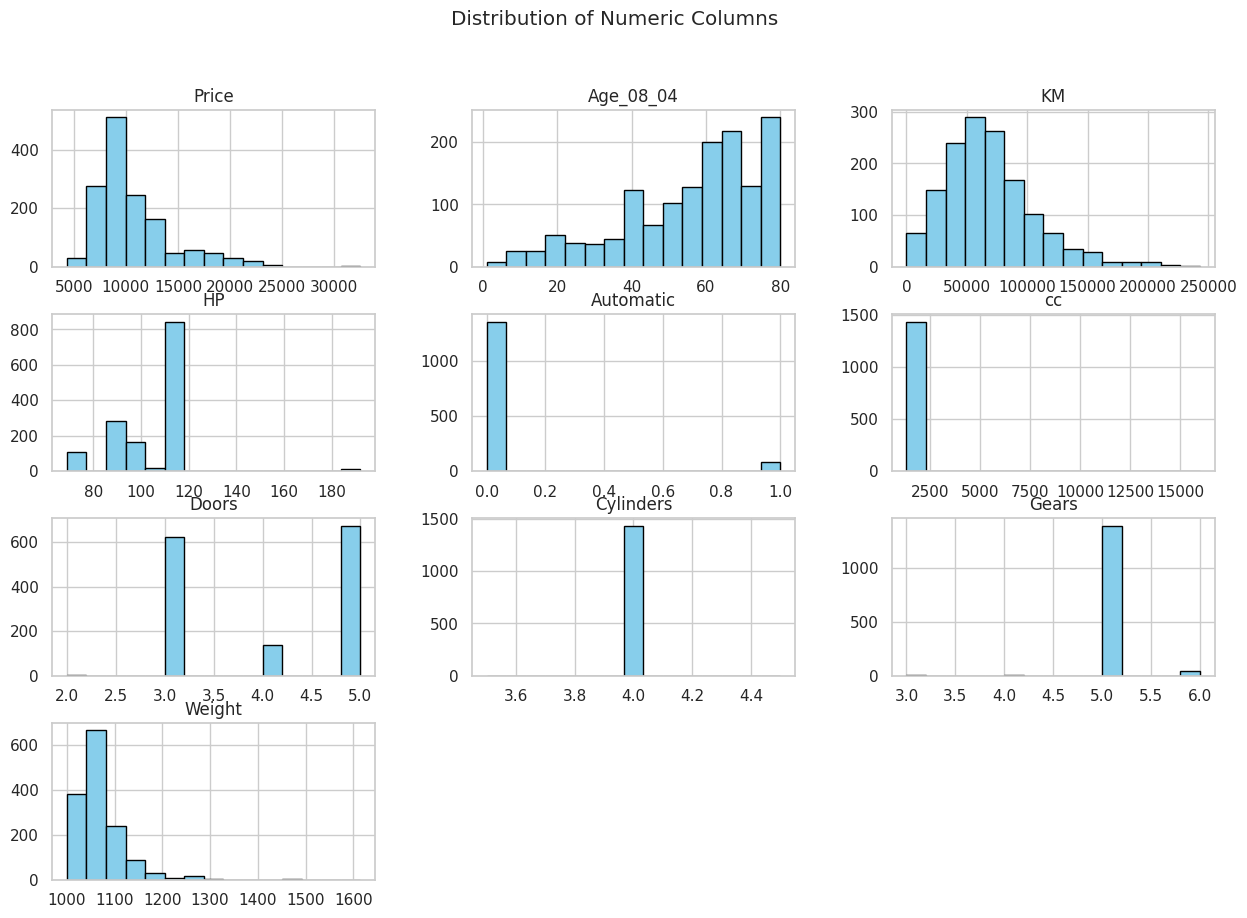

In [7]:
numeric_columns = toyota.select_dtypes(include=['float64', 'int64']).columns
# Histograms for numeric columns
toyota[numeric_columns].hist(figsize=(15, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Columns')
plt.show()

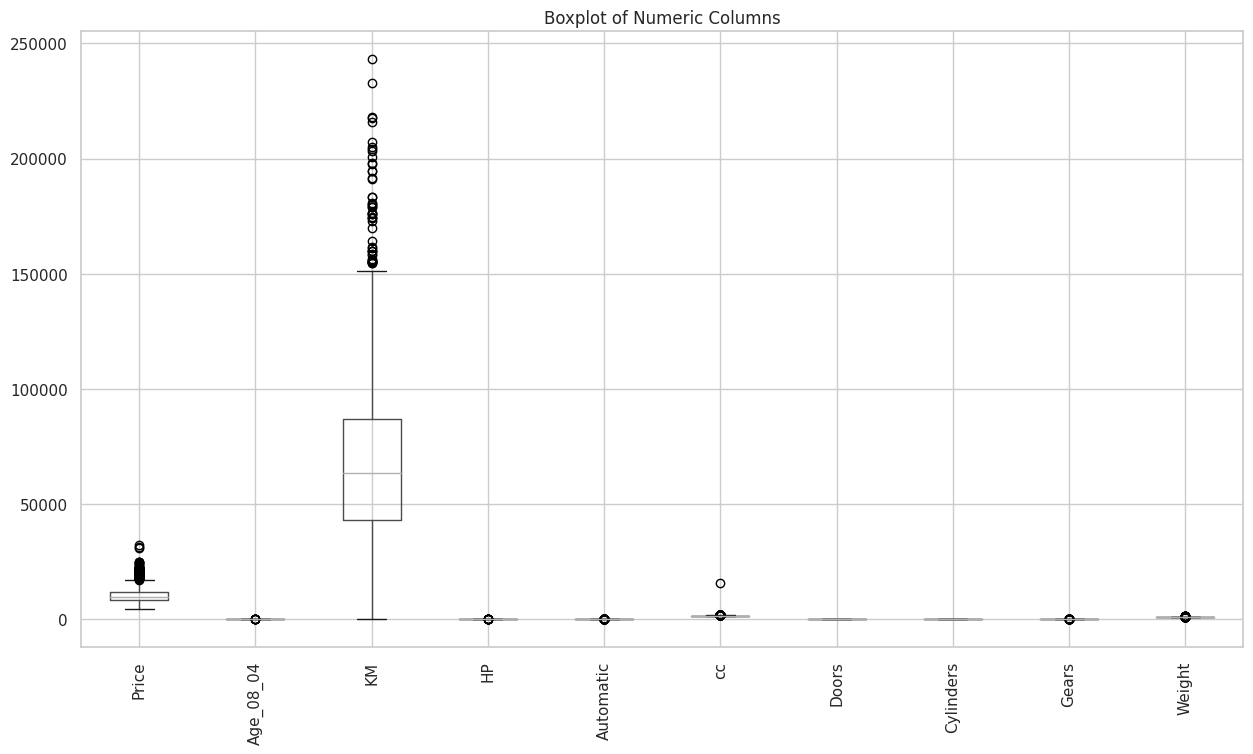

In [8]:
# Boxplot for outlier detection in numeric columns
plt.figure(figsize=(15, 8))
toyota[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=90)
plt.show()

# 2. Split the dataset into training and testing sets.

In [10]:
from sklearn.model_selection import train_test_split
# Assuming 'Price' is the target variable and the rest are features
# Adjusting the target variable if it's different
X = toyota.drop(columns=['Price'])  # Features (independent variables)
y = toyota['Price']  # Target (dependent variable)

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

Training set shape (X_train): (1148, 10)
Testing set shape (X_test): (288, 10)
Training target shape (y_train): (1148,)
Testing target shape (y_test): (288,)


# 3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [29]:
print(toyota.dtypes)
for col in toyota.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {toyota[col].unique()}")

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object
Unique values in Fuel_Type: ['Diesel' 'Petrol' 'CNG']


In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

categorical_cols = toyota.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {toyota[col].unique()}")

# Dropping the target variable 'Price' and use the rest as features (X)
X = toyota.drop(columns=['Price'])
y = toyota['Price']

# Applying one-hot encoding to categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), categorical_cols)], remainder='passthrough')
X = ct.fit_transform(X)

Unique values in Fuel_Type: ['Diesel' 'Petrol' 'CNG']


In [32]:
# Model 1: Multiple Linear Regression (All Features)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
r2_1 = r2_score(y_test, y_pred_1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))

print("Model 1 - All Features:")
print(f"R^2: {r2_1:.3f}, RMSE: {rmse_1:.3f}")

Model 1 - All Features:
R^2: 0.835, RMSE: 1484.265


In [34]:
# Model 2: Ridge Regression (Regularized Model)
model_2 = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
r2_2 = r2_score(y_test, y_pred_2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))

print("Model 2 - Ridge Regression:")
print(f"R^2: {r2_2:.3f}, RMSE: {rmse_2:.3f}")

Model 2 - Ridge Regression:
R^2: 0.835, RMSE: 1483.154


In [36]:
# Model 3: Using selected features (based on domain knowledge or correlation analysis)
selected_features = [i for i, col in enumerate(ct.get_feature_names_out()) if 'Age' in col or 'KM' in col or 'HP' in col]
X_train_subset = X_train[:, selected_features]
X_test_subset = X_test[:, selected_features]

model_3 = LinearRegression()
model_3.fit(X_train_subset, y_train)
y_pred_3 = model_3.predict(X_test_subset)
r2_3 = r2_score(y_test, y_pred_3)
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred_3))

print("Model 3 - Selected Features:")
print(f"R^2: {r2_3:.3f}, RMSE: {rmse_3:.3f}")

Model 3 - Selected Features:
R^2: 0.810, RMSE: 1590.843


# 4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate model performance
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"R²: {r2:.3f}")
    print(f"Adjusted R²: {adjusted_r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")

# Model 1: All features (Multiple Linear Regression)
print("Model 1 - All Features Evaluation:")
evaluate_model(y_test, y_pred_1)

# Model 2: Ridge Regression
print("\nModel 2 - Ridge Regression Evaluation:")
evaluate_model(y_test, y_pred_2)

# Model 3: Selected Features
print("\nModel 3 - Selected Features Evaluation:")
evaluate_model(y_test, y_pred_3)

Model 1 - All Features Evaluation:
R²: 0.835
Adjusted R²: 0.828
RMSE: 1484.265
MAE: 990.887

Model 2 - Ridge Regression Evaluation:
R²: 0.835
Adjusted R²: 0.829
RMSE: 1483.154
MAE: 990.734

Model 3 - Selected Features Evaluation:
R²: 0.810
Adjusted R²: 0.803
RMSE: 1590.843
MAE: 1111.542


In [39]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate model performance
def evaluate_model(y_test, y_pred, X_test):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"R²: {r2:.3f}")
    print(f"Adjusted R²: {adjusted_r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")

# Apply Ridge Regression
print("Ridge Regression:")
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter to control regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
# Evaluate Ridge Regression
evaluate_model(y_test, y_pred_ridge, X_test)

# Apply Lasso Regression
print("\nLasso Regression:")
lasso_model = Lasso(alpha=0.01)  # Adjust alpha to control regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
# Evaluate Lasso Regression
evaluate_model(y_test, y_pred_lasso, X_test)

Ridge Regression:
R²: 0.835
Adjusted R²: 0.829
RMSE: 1483.154
MAE: 990.734

Lasso Regression:
R²: 0.835
Adjusted R²: 0.828
RMSE: 1484.239
MAE: 990.888


In [40]:
import matplotlib.pyplot as plt
# Function to evaluate model performance and return evaluation metrics
def evaluate_model_return_metrics(y_test, y_pred, X_test):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return r2, adjusted_r2, rmse, mae

# Alpha values to experiment with
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Store the results for comparison
ridge_results = []
lasso_results = []

In [42]:
# Experiment with Ridge regression for different alpha values
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    r2, adj_r2, rmse, mae = evaluate_model_return_metrics(y_test, y_pred_ridge, X_test)
    ridge_results.append((alpha, r2, adj_r2, rmse, mae))

# Experiment with Lasso regression for different alpha values
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)

    r2, adj_r2, rmse, mae = evaluate_model_return_metrics(y_test, y_pred_lasso, X_test)
    lasso_results.append((alpha, r2, adj_r2, rmse, mae))

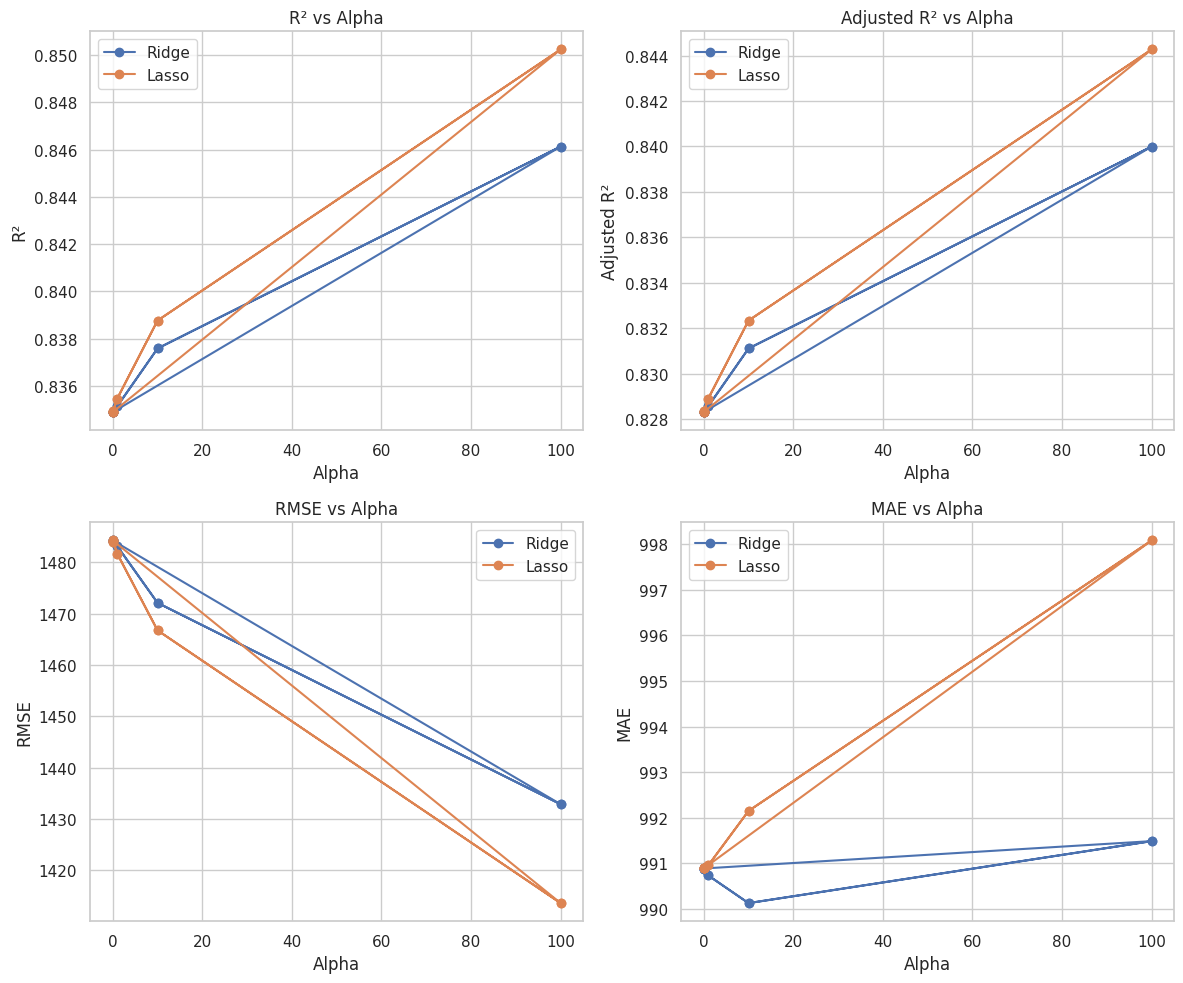

In [43]:
# Convert the results to pandas DataFrame for better visualization
ridge_df = pd.DataFrame(ridge_results, columns=['Alpha', 'R²', 'Adjusted R²', 'RMSE', 'MAE'])
lasso_df = pd.DataFrame(lasso_results, columns=['Alpha', 'R²', 'Adjusted R²', 'RMSE', 'MAE'])

# Plot the performance for Ridge and Lasso models
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# R² comparison
axs[0, 0].plot(ridge_df['Alpha'], ridge_df['R²'], label='Ridge', marker='o')
axs[0, 0].plot(lasso_df['Alpha'], lasso_df['R²'], label='Lasso', marker='o')
axs[0, 0].set_title('R² vs Alpha')
axs[0, 0].set_xlabel('Alpha')
axs[0, 0].set_ylabel('R²')
axs[0, 0].legend()

# Adjusted R² comparison
axs[0, 1].plot(ridge_df['Alpha'], ridge_df['Adjusted R²'], label='Ridge', marker='o')
axs[0, 1].plot(lasso_df['Alpha'], lasso_df['Adjusted R²'], label='Lasso', marker='o')
axs[0, 1].set_title('Adjusted R² vs Alpha')
axs[0, 1].set_xlabel('Alpha')
axs[0, 1].set_ylabel('Adjusted R²')
axs[0, 1].legend()

# RMSE comparison
axs[1, 0].plot(ridge_df['Alpha'], ridge_df['RMSE'], label='Ridge', marker='o')
axs[1, 0].plot(lasso_df['Alpha'], lasso_df['RMSE'], label='Lasso', marker='o')
axs[1, 0].set_title('RMSE vs Alpha')
axs[1, 0].set_xlabel('Alpha')
axs[1, 0].set_ylabel('RMSE')
axs[1, 0].legend()

# MAE comparison
axs[1, 1].plot(ridge_df['Alpha'], ridge_df['MAE'], label='Ridge', marker='o')
axs[1, 1].plot(lasso_df['Alpha'], lasso_df['MAE'], label='Lasso', marker='o')
axs[1, 1].set_title('MAE vs Alpha')
axs[1, 1].set_xlabel('Alpha')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [44]:
print("Ridge Regression Results:")
print(ridge_df)
print("\nLasso Regression Results:")
print(lasso_df)

Ridge Regression Results:
      Alpha        R²  Adjusted R²         RMSE         MAE
0     0.001  0.834889     0.828309  1484.264374  990.887100
1     0.010  0.834891     0.828311  1484.254993  990.885539
2     0.100  0.834912     0.828333  1484.160451  990.870125
3     1.000  0.835136     0.828565  1483.154196  990.733834
4    10.000  0.837582     0.831109  1472.110551  990.127381
5   100.000  0.846126     0.839993  1432.868585  991.486918
6     0.001  0.834889     0.828309  1484.264374  990.887100
7     0.010  0.834891     0.828311  1484.254993  990.885539
8     0.100  0.834912     0.828333  1484.160451  990.870125
9     1.000  0.835136     0.828565  1483.154196  990.733834
10   10.000  0.837582     0.831109  1472.110551  990.127381
11  100.000  0.846126     0.839993  1432.868585  991.486918

Lasso Regression Results:
      Alpha        R²  Adjusted R²         RMSE         MAE
0     0.001  0.834889     0.828309  1484.262806  990.887341
1     0.010  0.834895     0.828314  1484.239332